# TD 6A : Code Jam (correction)

In [4]:
import pyensae
%nb_menu

### Problème de recouvrement

Le problème est tiré de [Google Jam 2008, round 1A](https://code.google.com/codejam/contest/32016/dashboard#s=p0).

On considère deux tableaux $v=(v_1,..., v_n)$ et $w=(w_1,...,w_n)$. On souhaite le minimum : $\min_{\sigma,\sigma'} \sum_{i=1}^{n} v_{\sigma(i)} w_{\sigma'(i)}$ où $\sigma,\sigma'$ sont deux permutations de l'ensemble $[[1,...,n]]$.

#### Première solution

Elle est inspiré de la [distance d'édition](http://fr.wikipedia.org/wiki/Distance_de_Levenshtein). Si on doit recouvrir l'ensemble des entiers $[[0,n]]$, on passe en revue tous les intervalles qui inclut 0. On construit deux tableaux :

* $entier[i]$ : conserve le nombre minimum d'intervalles pour couvrir tous les entiers de $0$ à $i$
* $pred[i]$ : conserver le dernier intervalle utilisé pour recouvrir $i$

On commence par initialiser $entier[0]$ en passant en revue tous les intervalles qui inclut 0. Pour trouver $entier[i+1]$, on passe en revue tous les intervalles $[a,b]$, et on affirme que:

$entier[n+1] = \min \{ entier[a] + 1 \; si \; a \leqslant n+1 \leqslant b \}$

Le tableau $pred[n+1]$ conserve l'intervalle qui minimise le problème de minimisation précédent.

Une fois les tableaux $entier$ et $pred$ renseigné, on utilise le tableaux $pred$ pour retrouver la solution.

In [5]:
def recouvrement(B, intervalles) :
    # initialisation
    entier = {}
    pred   = {}
    for a,b in intervalles:
        if 0 <= a <= B :
            for k in range(0,b+1):
                entier[k] = 1
                pred [k] = (a,b)
    
    # programmation dynamique
    i = 0
    while i <= B:
        mini = None
        best = None 
        for a,b in intervalles:
            if a <= i <= b:
                a = max(0,a)
                for l in range(a, b+1):
                    if l in entier:
                        d = entier[l] + 1
                        if mini is None or d < mini:
                            mini = d
                            best = (a,b)
        entier[i] = d
        pred[i] = best
        i += 1
        
    # on retourne la solution
    if B in entier:
        sol = []
        while B > 0:
            p = pred[B]
            m = max(0,p[0])
            sol.append ( p )
            B = p[0]
        sol.reverse()
        return sol
    else:
        # la solution n'existe pas
        return None
        
b = 1
intervalles = [ (-1, 0), (0,1), (0,0) ]
print("sol=",recouvrement(b, intervalles))

sol= [(0, 1)]


#### Seconde solution

Ce programme améliore la solution précédente.

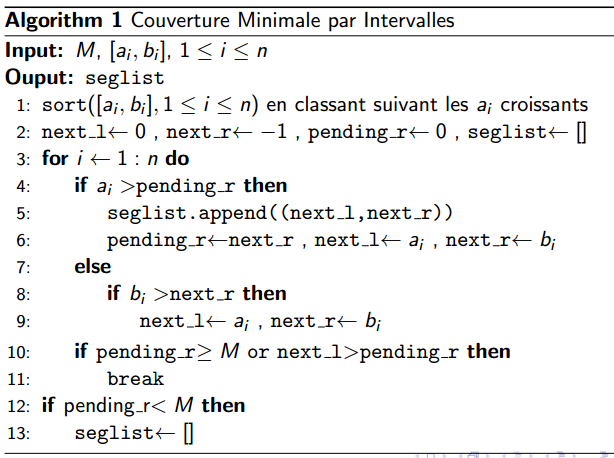

In [6]:
from IPython.core.display import Image
Image("inter.png", width=500)

In [7]:
# solution par Benjamin DONNOT
def solve(B, intervalles):
    res = []
    upper = 0
    while True:
        aux = []
        for x in intervalles :
            if x[0] <= upper:
                aux.append ( x )
                
        new_intervalles = []
        for x in intervalles :
            new_intervalles.append ( x )
        intervalles = new_intervalles 
        
        if (aux ==[]) :
            return '0\n'
        
        mymax = max(aux,key=lambda x: x[1])
        res.append(mymax)
        upper = mymax[1]
        if(upper >= B):
            break
            
    return res

b = 1
intervalles = [ (-1, 0), (0,1), (0,0) ]
print("sol=",solve(b, intervalles))

sol= [(0, 1)]


Vous pouvez observer le déroulement de ces deux solutions sur [PythonTutor](http://pythontutor.com/).

### Découpage intelligent d'une base de données